# TME: Community Detection

### In this TME, you implement, apply and compare community detection algorithms.

In [39]:
from TP7_utility_functions import *
from random import shuffle
from json import dumps

## Preparatory Instructions

#### Packages
Make sure, you have installed the following Packages:
* pip install numpy
* pip install scipy
* pip install scikit-learn
* pip install networkx
* pip install python-mnist
* pip install python-louvain
* pip install matplitlib

#### KNN - Graph
Additionally, make sure to have the python file **utility_functions.py** provided by the teacher. All functions listed in the appendix are contained in this file.

#### Data
Lastly, make sure to have the MNIST dataset in your working directory

---------


## TME Instructions

### Exercise 1: Exploratory data analysis

A common approach for data analysis is to look for patterns visually. This is also the case for community detection. 

Recall that a community is a group of vertices more densely connected between them than towards the rest the network. Therefore, it is common to try to see if there exists a community structure by visualizing the network and looking for groups of densely interconnected vertices. 

Naturally, if clusters can be identified visually, why to bother with community detection algorithms? The goal of this exercise is to explore the advantages and limitations of the exploratory approach for community detection and to motivate the need for automatic algorithms. 

#### 1.1:  Communities on the Stochastic Block Model

**1.1.1**. Generate a network from the stochastic block model (SBM). \
Use the following parameters: nodes_community=200, num_communities=5, degree_in = 5, degree_out = 0.5.

In [ ]:
sbm_network_adj, sbm_labels = get_SBM_network(200, 5, 5, 0.5)

**1.1.2**. Visualize the network using the function network_visualization()

In [ ]:
network_visualization(sbm_network_adj)

**1.1.3**. Repeat 1.1.1 and 1.1.2 multiple times by changing the values of the SBM parameters

In [ ]:
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.5)
result = network_visualization(sbm_network_adj)

In [ ]:
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.05)
result = network_visualization(sbm_network_adj)

In [ ]:
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.005)
result = network_visualization(sbm_network_adj)

**1.1.4**. Repeat the steps above but this time visualize the network with nodes colored according to the ground truth communities

In [ ]:
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.5)
result = network_visualization(sbm_network_adj, community_assignment=sbm_labels)
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.05)
result = network_visualization(sbm_network_adj, community_assignment=sbm_labels)
sbm_network_adj, sbm_labels = get_SBM_network(10, 5, 5, 0.005)
result = network_visualization(sbm_network_adj, community_assignment=sbm_labels)

#### 1.2:  Communities on the MNIST handwritten digit dataset

**1.2.1**. Generate a network of K-nearest neighbors of the MNIST handrwitten digits. \
Use the following parameters: KNN=50, images_per_digit=300

In [ ]:
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=50, images_per_digit=300, seed=0)

**1.2.2**. Visualize the network using the function network_visualization()

In [ ]:
result = network_visualization(knn_adj)

**1.2.3**. Repeat 1.1.1 and 1.1.2 multiple times by changing the values of KNN and images_per_digit

In [ ]:
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=1, images_per_digit=300, seed=0)
result = network_visualization(knn_adj)

In [ ]:
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=10, images_per_digit=300, seed=0)
result = network_visualization(knn_adj)

In [ ]:
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=30, images_per_digit=300, seed=0)
result = network_visualization(knn_adj)

**1.2.4**. Repeat the steps above but this time visualize the network with nodes colored according to the ground truth communities

In [ ]:
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=1, images_per_digit=300, seed=0)
result = network_visualization(knn_adj, community_assignment=knn_label)
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=10, images_per_digit=300, seed=0)
result = network_visualization(knn_adj, community_assignment=knn_label)
knn_adj, knn_label = get_mnist_KNN_network("MNIST_data", KNN=30, images_per_digit=300, seed=0)
result = network_visualization(knn_adj, community_assignment=knn_label)

#### Questions  


1. How the SBM Parameters affect community structure?

2. How the number of nearest neighrbors (KNN) affect community structure?

---- Without coloring the ground-truth communities ----

3. For which regime of parameters we can visually identify communities in the SBM? (For example: when degree_in is X times larger than degree_out)

4. For which regime of parameters we can visually identify communities in the MNIST?

---- With colored ground truth communities -----

5. For which regime of parameters the ground-truth communities of the SBM can be visually identified?

6. For which regime of parameters the ground-truth communities of the MNIST can be visually identified?

7. How does the number of nodes in the network affect the regime of parameters where we can visually identify communities? (For example: in one graph a value of KNN = 10 may work, but in a larger one this may not be the case)
 
8. Is it true the hypothesis that images of one same digit in the MNIST dataset form a community?

9. Discuss the advantages and limitations of the exploratory approach for community detection.

### Exercise 2: Density-based community detection

#### 2.1:  Binary community detection task 

**2.1.1**. In separate file implement a function called **exact_community_detection()** that solves the density-based community detection task for two communities (Slide 9 of course). 

Reminder: we should split the set of vertices in two disjoint groups $V = S_1 \cup S_2$ and count

$$\sum_{i = 1}^2 \sum_{v \in S_i} d(v)_{in} - d(v)_{out} $$

The goal is to find the sets $S_1$ and $S_2$ that minimize this quantity. For this we need to test all possible sets $S_1$ and $S_2$, for which you should use the **powerset** function whose details are in the appendix.

Your implementation of **exact_community_detection()** should receive a sparse adjacency matrix of the graph and should return a dictionary with the community assignment (keys are node IDs and values are the community assigned (1) or (2))

**2.1.2**. Generate a SBM graph with 2 communities and use the function **exact_community_detection()** to detect the communities of this graph.

For the SBM, use the following parameters: nodes_community=10, num_communities=2, degree_in = 5, degree_out = 0.5.

In [29]:
def degree_in(node, s , adjacency_matrix):
    degree = 0
    for neighbour in range(len(adjacency_matrix)):
        if adjacency_matrix[node][neighbour] == 1: # if nodes linked
            if neighbour in s:
                degree += 1
    return degree

def degree_out(node, s, adjacency_matrix):
    degree = 0
    for neighbour in range(len(adjacency_matrix)):
        if adjacency_matrix[node][neighbour] == 1: # if nodes linked
            if neighbour not in s:
                degree += 1
    return degree          
def exact_community_detection(adjacency_matrix):
    '''
    Solve the density based community detection task for two communities
    '''
    adjacency_matrix = adjacency_matrix.toarray().astype(int)
    nodes = set([i for i in range(len(adjacency_matrix))])
    all_sets = powerset(nodes)
    min_quantity = None
    set_min = None
    nb_set_processed = 0
    len_all_sets = len(all_sets)
    for my_set in all_sets: # for all possible set1 and set2 compute the quantity
        my_sum = 0 # init the sum
        s = [my_set, nodes.difference(my_set)]
        nb_set_processed += 1
        #print(f"\r{round(nb_set_processed / len_all_sets * 200, 2)} %", flush=True,end ="")
        if tuple(s[1]) in all_sets:
            all_sets.remove(tuple(s[1]))
        # compute sum of degree in minus degree out
        for i in range(2):
            for node in s[i]:
                my_sum += degree_in(node, s[i], adjacency_matrix) 
                my_sum -= degree_out(node, s[i], adjacency_matrix)
        
        
        if min_quantity is None or my_sum < min_quantity :
            min_quantity = my_sum
            set_min = s
    return set_min, min_quantity

([(0, 1, 5, 7, 9), {2, 3, 4, 6, 8, 10, 11}], -26)

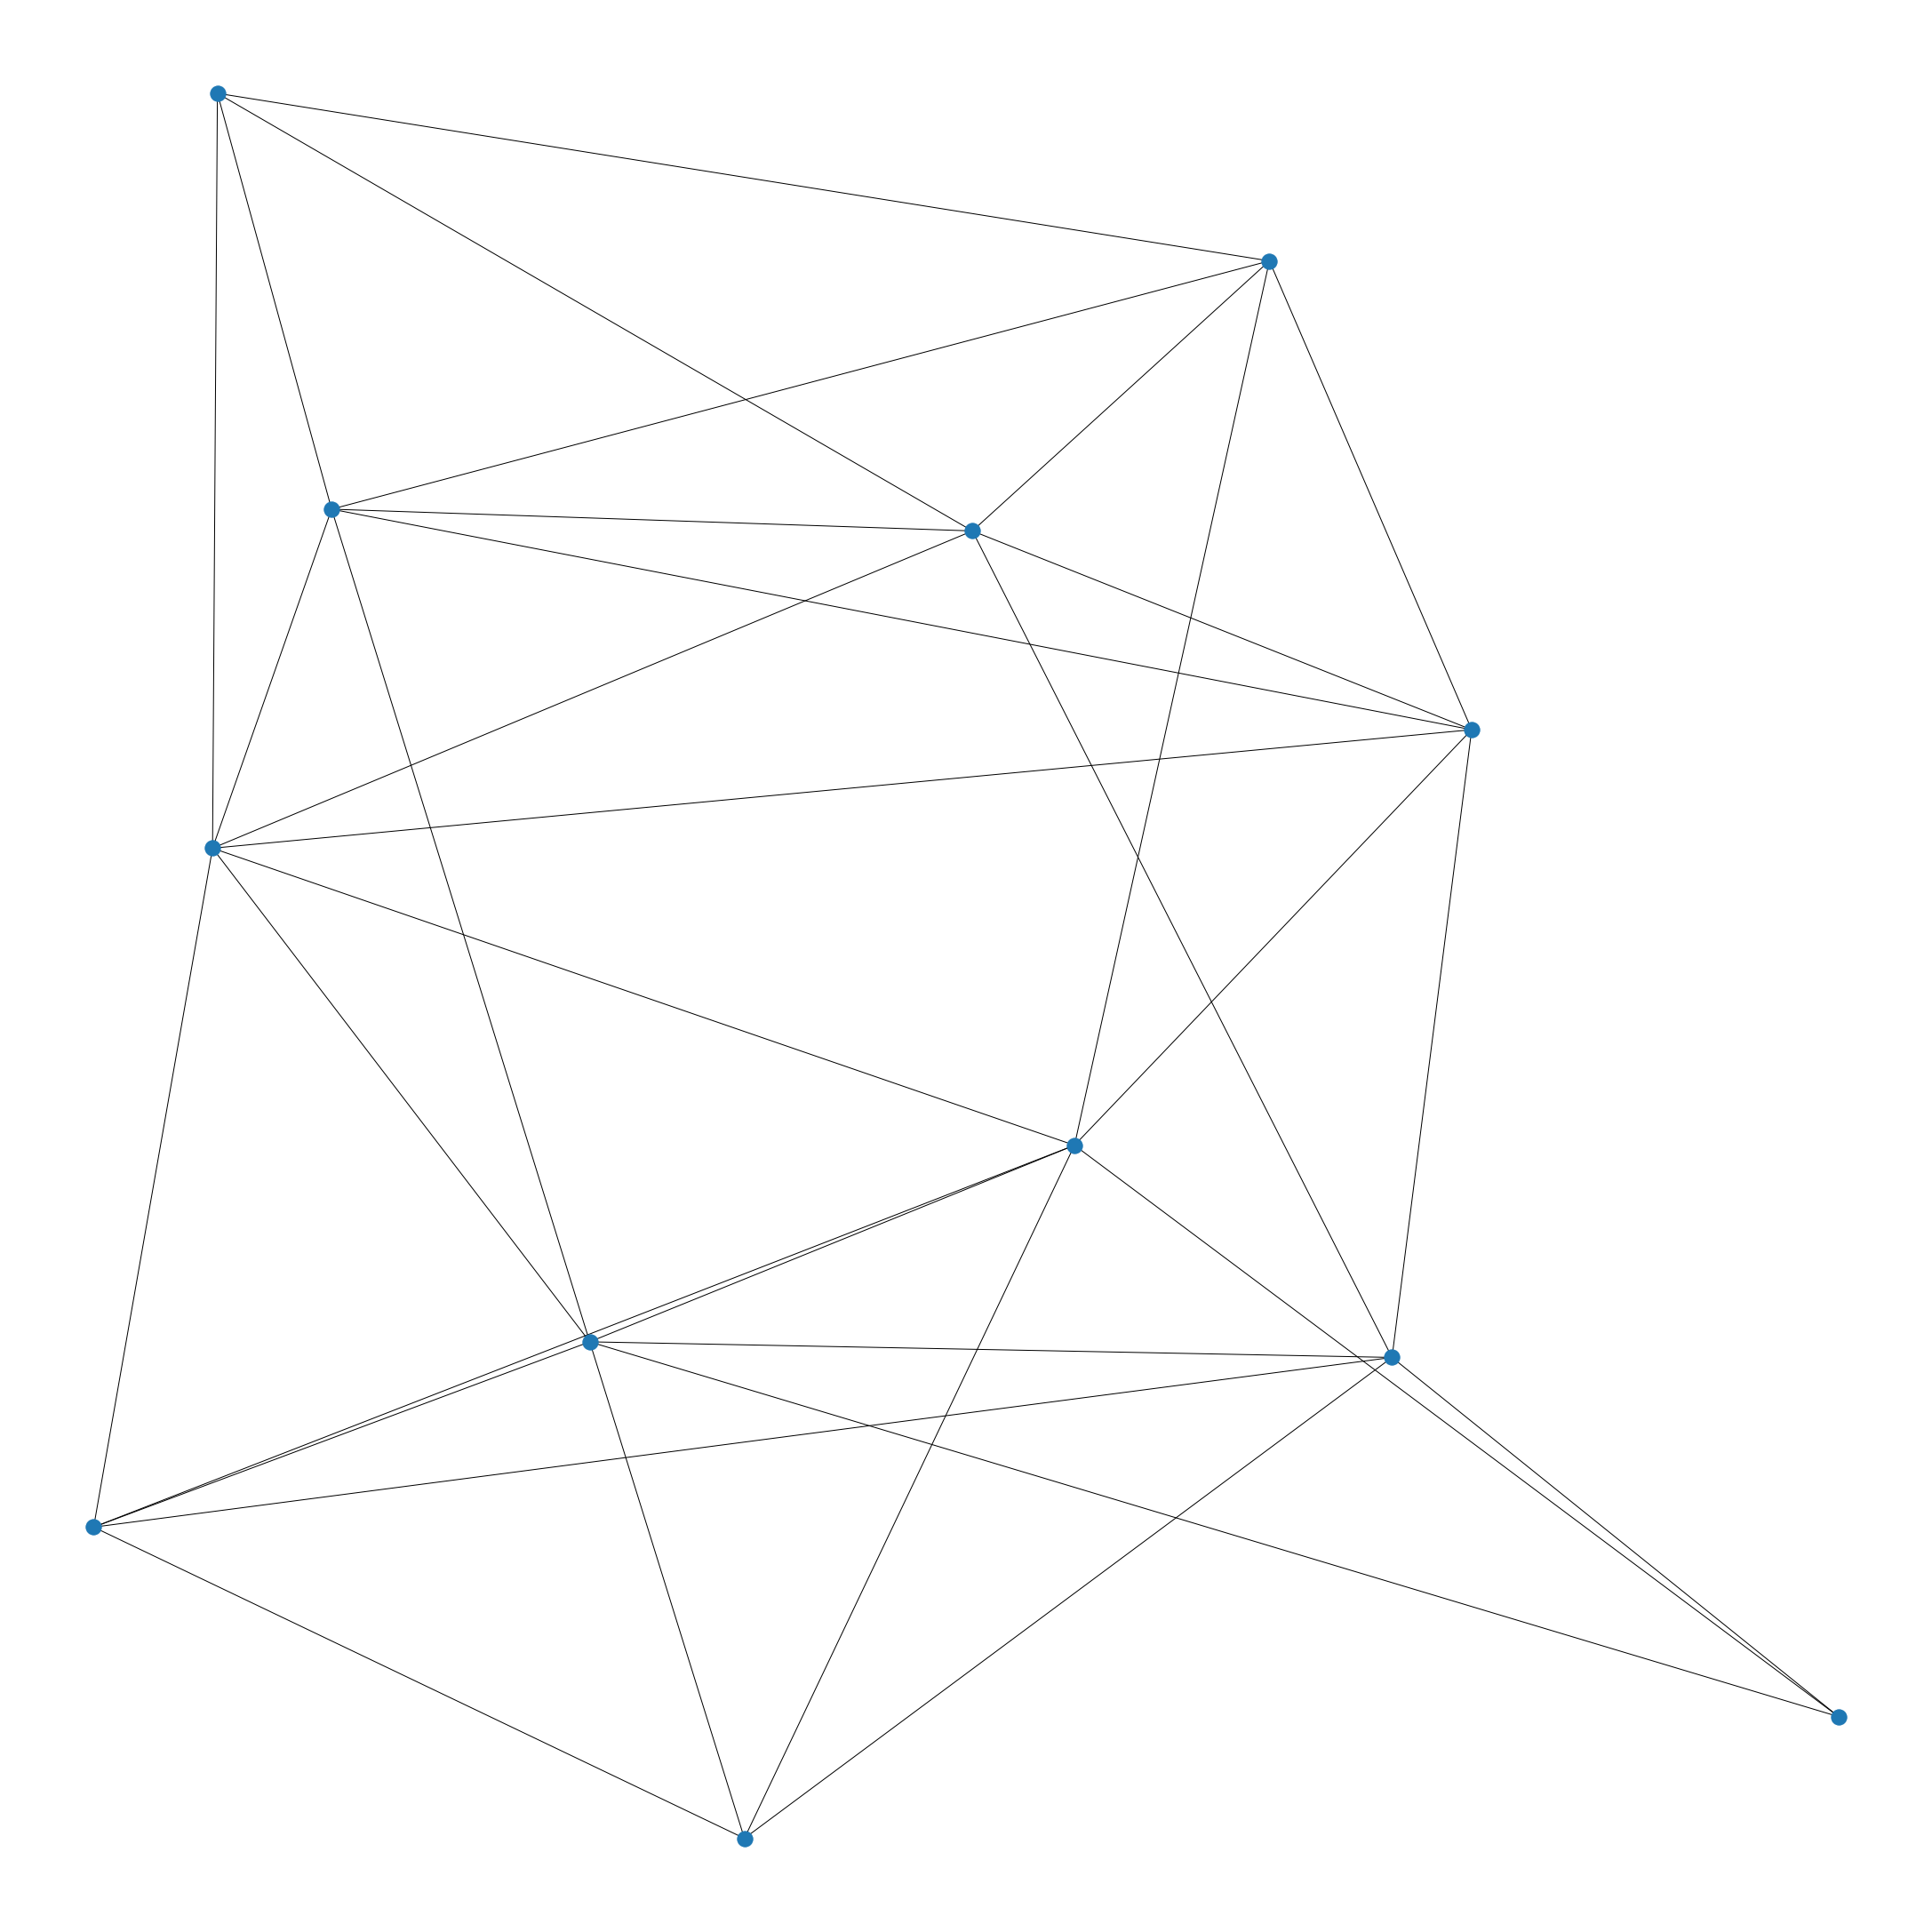

In [31]:
adjacency_matrix, _ = get_SBM_network(7, 2, 5, 0.5)
result = network_visualization(adjacency_matrix)
exact_community_detection(adjacency_matrix)



**2.1.3**. Repeat 2.1.2 by increasing the value of *nodes_community*.

**2.1.4**. Evaluate the output of the function exact_community_detection() visually.

#### Questions 

1. Is the density-based community detection able to identify the ground truth communities?
2. What is the time complexity of exact_community_detection()?

### Exercise 3: Label propagation algorithm

Now that you have faced some of the limitations of the exploratory approach and the exact method, we relax the time complexity by means of the label propagation algorithm.

#### 3.1: Implementation of Label propagation algorithm

**3.1.1**. In separate file implement the label propagation algorithm through a function called **label_propagation_communities()**. This function should receive the sparse adjacency matrix and it should return a dictionary with the community assignment (keys are node IDs and values are communities) 

In [54]:
def convert_to_adjacency(adjacency_matrix, size):
    col, row = adjacency_matrix.nonzero()
    my_graph = {}
    for i in range(size):
        my_graph[i] = []
    for i in range(len(col)):
        my_graph[col[i]].append(row[i])
    return my_graph

def init_assignment(node_ids, community_assignment):
    for node_id in node_ids:
        community_assignment[node_id] = node_id
def get_frequences_labels(neighbours, community_assignment):
    frequencies_labels = {}
    for neighbour in neighbours:
        neighbour_label = community_assignment[neighbour]
        if neighbour_label not in frequencies_labels:
            frequencies_labels[neighbour_label] = 0
        frequencies_labels[neighbour_label] += 1
    return frequencies_labels
        
def label_propagation_communities(adjacency_matrix):
    community_assignment = {}
    size = len(adjacency_matrix.toarray())
    node_ids = [node_id for node_id in range(size)]
    my_graph = convert_to_adjacency(adjacency_matrix, size)
    init_assignment(node_ids, community_assignment) # step 1
    shuffle(node_ids) # step 2
    end = False
    while not end:
        
        for node_id in node_ids: # step 3
            neighbours = my_graph[node_id]
            frequencies_labels = get_frequences_labels(neighbours, community_assignment)
            if len(frequencies_labels) > 0:
                
                max_frequency_label = max(frequencies_labels, key=frequencies_labels.get)
                community_assignment[node_id] = max_frequency_label
        
        # print(dumps(community_assignment, indent = 4))
        for node_id in node_ids:
            node_label = community_assignment[node_id]
            neighbours = my_graph[node_id]
            frequencies_labels = get_frequences_labels(neighbours, community_assignment)
            if len(frequencies_labels) > 0:
                max_frequency_label = max(frequencies_labels, key=frequencies_labels.get)
                # print(node_label, max_frequency_label)
                if node_label != max_frequency_label:
                    end = False
                    break
                else:
                    end = True
        
    return community_assignment

{0: 0,
 1: 8,
 2: 8,
 3: 8,
 4: 8,
 5: 8,
 6: 8,
 7: 8,
 8: 8,
 9: 8,
 10: 8,
 11: 8,
 12: 8,
 13: 8,
 14: 8,
 15: 8,
 16: 8,
 17: 8,
 18: 8,
 19: 8,
 20: 20,
 21: 20,
 22: 20,
 23: 20,
 24: 20,
 25: 20,
 26: 20,
 27: 20,
 28: 20,
 29: 20,
 30: 20,
 31: 20,
 32: 20,
 33: 20,
 34: 20,
 35: 20,
 36: 20,
 37: 20,
 38: 20,
 39: 20,
 40: 45,
 41: 45,
 42: 45,
 43: 45,
 44: 45,
 45: 45,
 46: 45,
 47: 45,
 48: 45,
 49: 45,
 50: 45,
 51: 45,
 52: 45,
 53: 45,
 54: 45,
 55: 45,
 56: 45,
 57: 45,
 58: 45,
 59: 45,
 60: 63,
 61: 63,
 62: 63,
 63: 63,
 64: 63,
 65: 45,
 66: 63,
 67: 63,
 68: 63,
 69: 63,
 70: 63,
 71: 63,
 72: 63,
 73: 63,
 74: 63,
 75: 63,
 76: 63,
 77: 63,
 78: 63,
 79: 63,
 80: 20,
 81: 20,
 82: 20,
 83: 20,
 84: 20,
 85: 8,
 86: 20,
 87: 20,
 88: 20,
 89: 20,
 90: 20,
 91: 20,
 92: 20,
 93: 20,
 94: 20,
 95: 20,
 96: 20,
 97: 8,
 98: 20,
 99: 20}

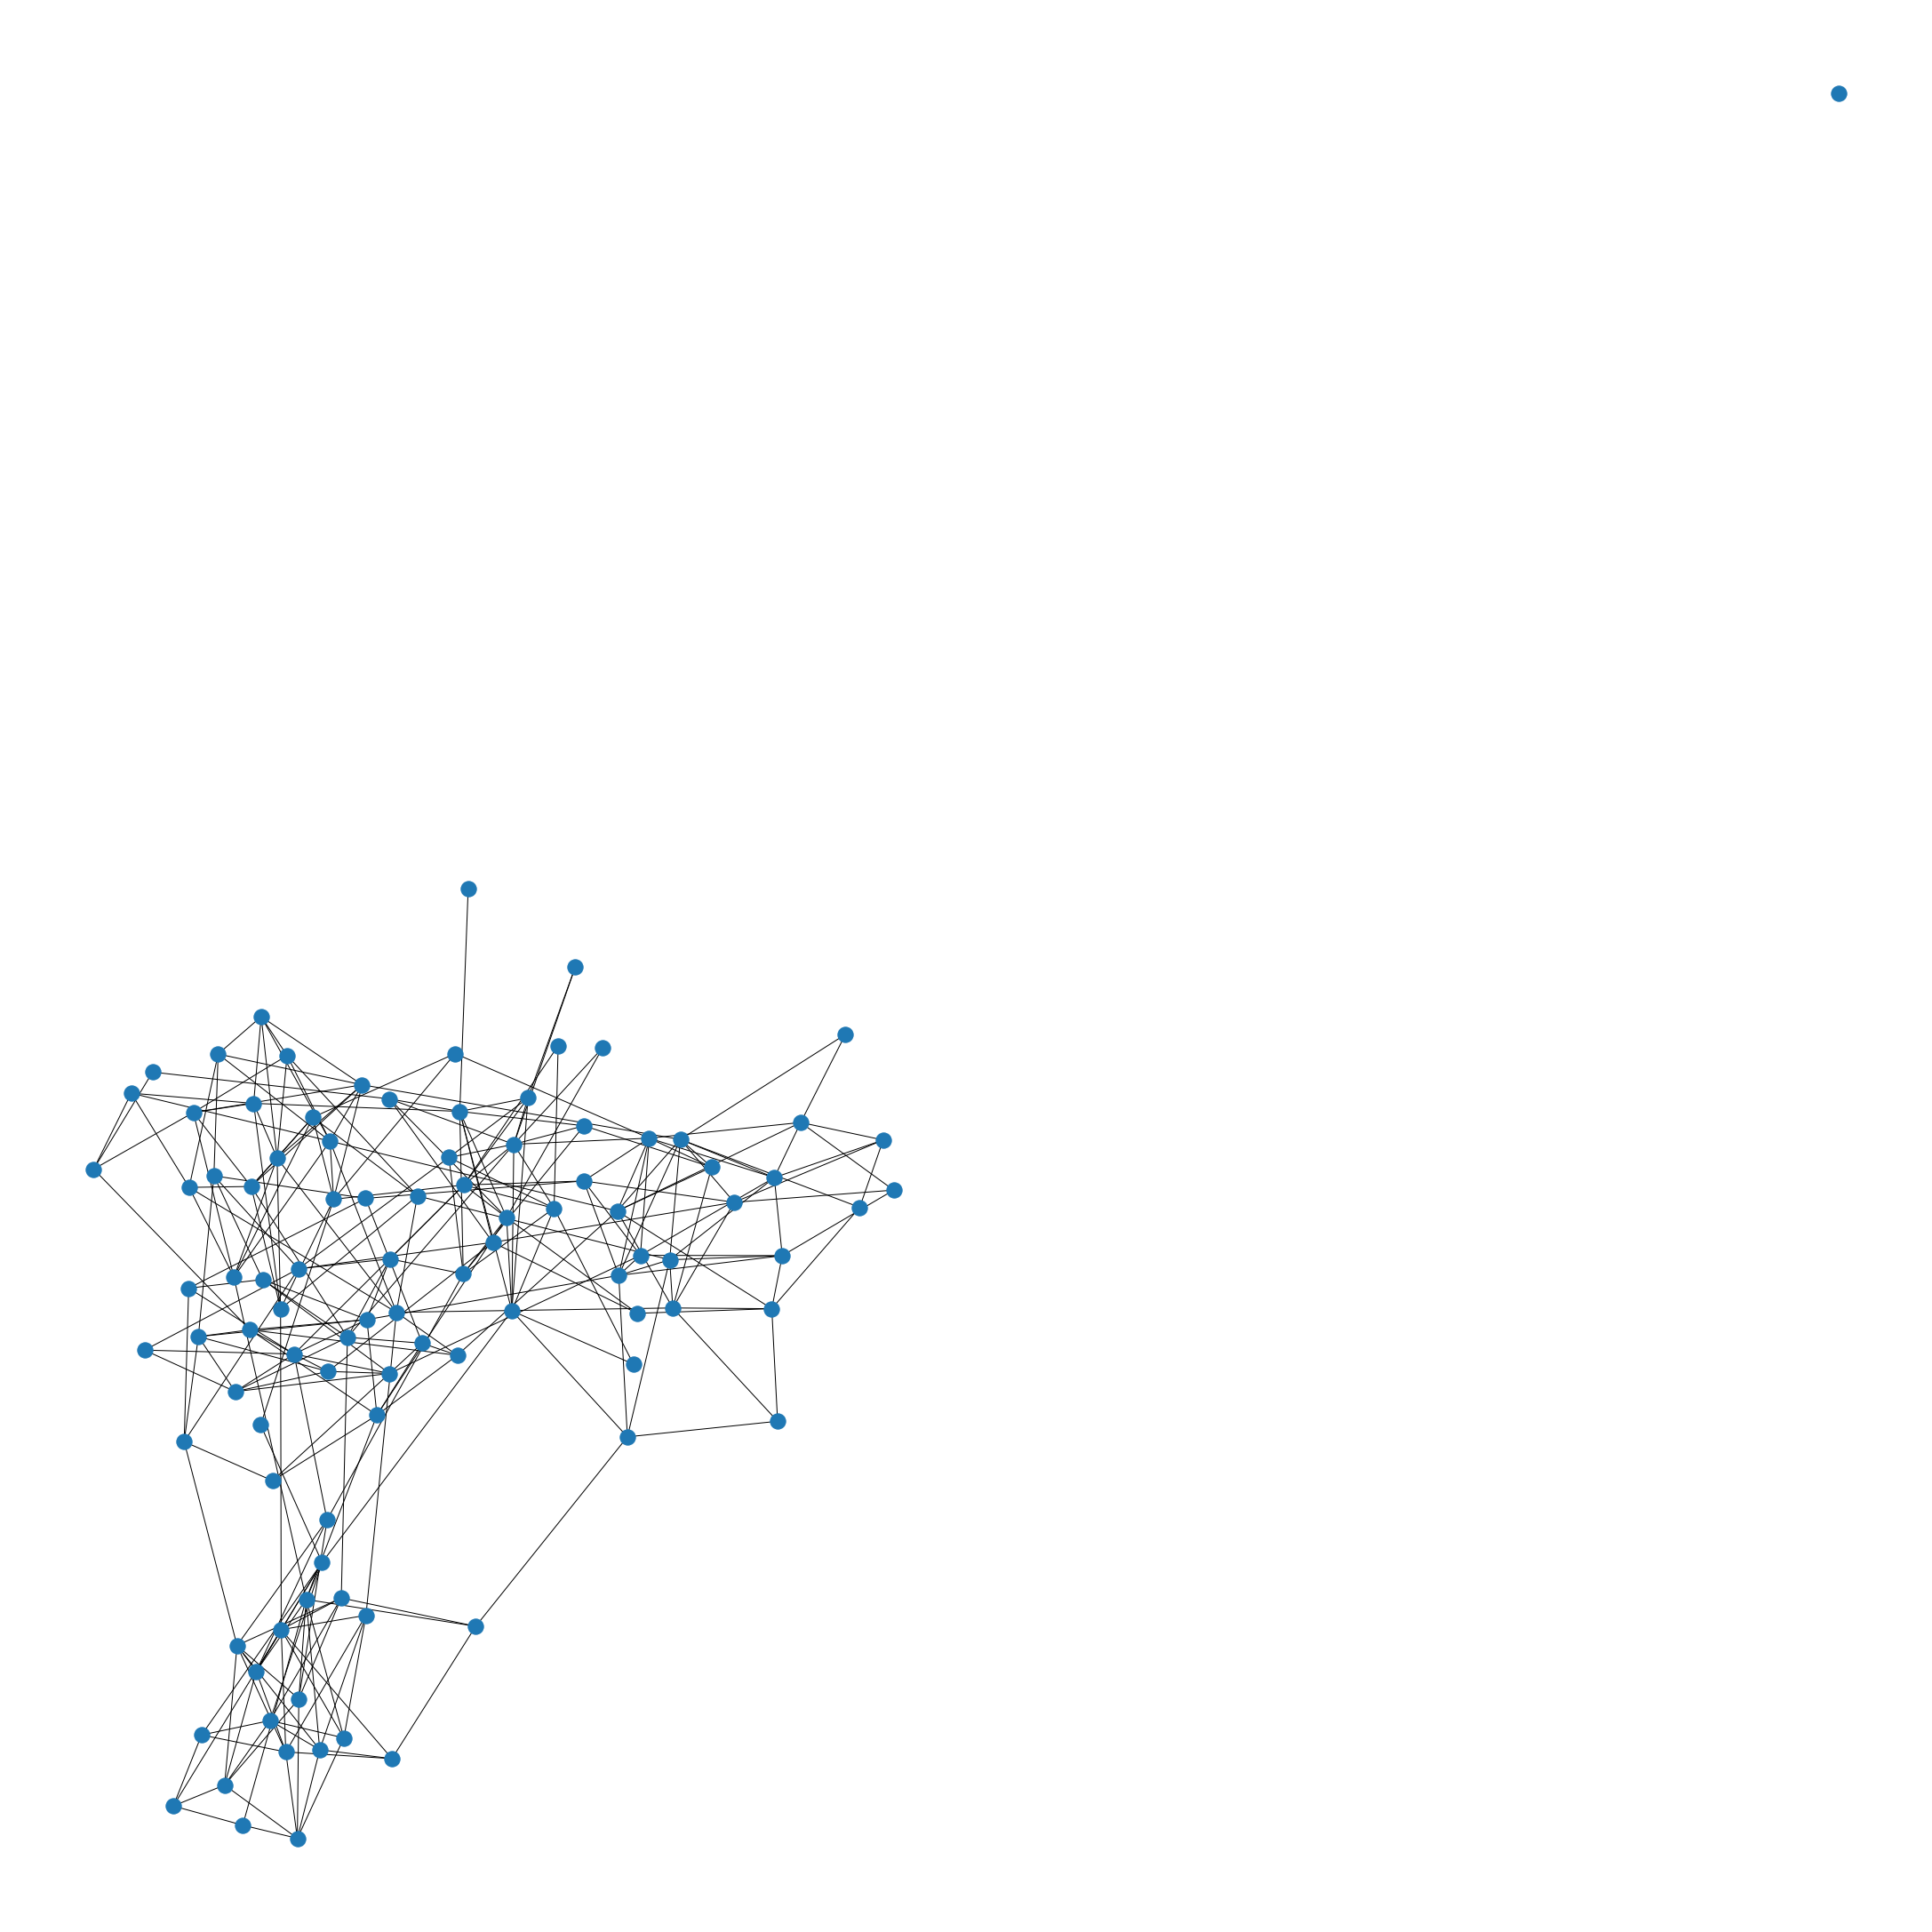

In [59]:
adjacency_matrix, _ = get_SBM_network(20,5,5,0.05)
result = network_visualization(adjacency_matrix)
label_propagation_communities(adjacency_matrix)

**3.1.2**. Apply the algorithm multiple times on the SBM and MNIST networks for different values of their parameters.

#### 3.2: Evaluation of Label propagation algorithm

**3.2.1**. Evaluate the output of the label propagation algorithm visually

**3.2.2**. Evaluate the output of the label propagation via the normalized mutual information score.

#### Questions  
1. Exaplain why the output of the label propagation algorithm is different for each run.
2. Discuss if the communities found change significantly for different runs. 
3. Discuss the advantages and limitations of the label propagation algorithm for community detection.

### Exercise 4: Louvain algorithm

From exercise 3 we learned that the simple label propagation algorithm can provide meaningful and scalable community detection, yet the algorithm still has several limitations. The goal of this excercise is to apply the Louvain algorithm and to evaluate the performance of community detection algorithms through modularity. 

#### 4.1: Evaluation of Louvain algorithm

**4.1.1**. Apply the algorithm multiple times on the SBM and MNIST networks for different values of their parameters.

**4.1.2**. Evaluate the output of the Louvain algorithm visually and through the normalized mutual information score.

**4.1.3**. Measure the quality of the communities assgined by the Louvain algorithm and Label propagation algorithms. Compare these values with the modularity of the ground truth communities. 

#### Questions  
1. Which algorithm finds better communities, the label propagation or the Louvain algorithm? 
2. Discuss the advantages and disadvantages of the modularity score over the normalized mutual information to assess the quality of an algorithm.

------------------------------

## Appendix

### Generating a stochastic block model network

**get_SBM_network(nodes_community, num_communities, deg_in, deg_out, seed=0)**

Input:
- nodes_community: Number of nodes per community
- mum_communities: Number of communities
- deg_in: Average degree of vertices towards its own community
- deg_out: Average degree of vertices towards other communities
- seed: Random seed for reproducibility

Output:
- Adj: Sparse adjacency matrix (Scipy sparse matrix)
- ground_truth: Dictionary with ground truth communities ( ground_truth[ node_id ] = community )

### Generating a K-nearest neighbor graph from MNIST dataset

**get_mnist_KNN_network(mnist_path, KNN=15, images_per_digit=300, seed=0)**

Input:
- mnist_path: Path towards MNIST dataset
- KNN: Nearest neighbors to branch
- images_per_digit: Number of image samples per digit (nodes per community)
- seed: Random seed for reproducibility

Output:
- Adj: Sparse adjacency matrix (Scipy sparse matrix)
- ground_truth: Dictionary with ground truth communities ( ground_truth[ node_id ] = community )

### Visualizing a network

**network_visualization( Adj, zoom, layout (optional), community_assignment (optional) )**

Input:
- Adj: Network adjacency matrix (Scipy sparse matrix)
- zoom: Visualization scale
- layout (optional): coordinates to employ (if not provided a new one will be computed)
- community_assignment (optional): Community assignment to color nodes according to their community (community_assignment[node_id] = community)

Output:
- layout: coordinates employed

### Louvain Algorithm

**louvain_communities(Adj)**

Input:
- Adj: Network adjacency matrix

Output:
- Community_assignment: Output of Louvain algorithm (Dictionary[node_id] = community)

### Normalized Mutual Information

**nmi_score(Adj, ground_truth, community_assignment)**

Input:
- Adj: Network adjacency matrix (Scipy sparse matrix)
- ground_truth: dictionary with ground_truth communities
- community_assignment: dictionary with the community assignment to evaluate

Output:
- nmi: normalized mutual information score (0 means no correlation, 1 means perfect correlation)

### Modularity

**modularity_score(Adj, community_assignment)**

Input:
- Adj: Network adjacency matrix (Scipy sparse matrix)
- community_assignment: dictionary with the community assignment to evaluate

Output:
- modularity: modularity score (-1 means no community structure, 1 means strong community structure)

### All subsets of a set
**powerset(node_set)**

Input:
- node_set: Set with vertices of the network

Output:
- list_all_subsets: list with all subsets of node_set